In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset = pd.read_csv("C:/Users/user/Downloads/Raisin_Dataset.csv")
dataset

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [3]:
dataset.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

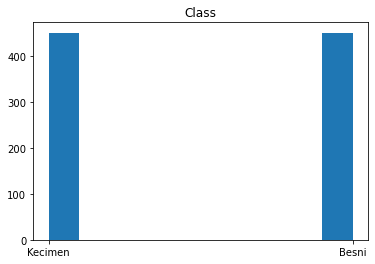

In [4]:
dataset.describe()
plt.hist(dataset['Class'])
plt.title('Class')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
for i in dataset.columns:
    dataset[i]=encoder.fit_transform(dataset[i])

In [6]:
dataset

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [7]:
X = dataset.iloc[:,0:7].values
y = dataset.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [8]:
X

array([[551, 553, 500, ..., 542, 811, 544],
       [404, 446, 409, ..., 413, 299, 453],
       [583, 554, 581, ..., 571, 102, 573],
       ...,
       [640, 517, 739, ..., 650, 722, 656],
       [600, 633, 506, ..., 600, 177, 622],
       [529, 706, 200, ..., 532,  82, 643]], dtype=int64)

In [9]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
#softmax, tanh
model.add(Dense(64,input_shape=(7,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))
 
model.compile(Adam(lr=0.004), loss = 'binary_crossentropy',metrics=['accuracy'])
#categorical_crossentropy

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,154
Trainable params: 3,154
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 10.1620 - accuracy: 0.6222 - val_loss: 0.6259 - val_accuracy: 0.7278
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6639 - val_loss: 0.6154 - val_accuracy: 0.7556
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.7028 - val_loss: 0.5532 - val_accuracy: 0.7722
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7056 - val_loss: 0.5755 - val_accuracy: 0.7833
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.7431 - val_loss: 0.5323 - val_accuracy: 0.7556
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7431 - val_loss: 0.5284 - val_accuracy: 0.7444
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.7139 - val_loss: 0.7734 - val_accuracy: 0.7611
Epoch 8/100

Epoch 59/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8569 - val_loss: 0.3032 - val_accuracy: 0.9000
Epoch 60/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.8653 - val_loss: 0.3298 - val_accuracy: 0.8611
Epoch 61/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.8514 - val_loss: 0.3414 - val_accuracy: 0.8778
Epoch 62/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8667 - val_loss: 0.2956 - val_accuracy: 0.8944
Epoch 63/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.8611 - val_loss: 0.2971 - val_accuracy: 0.8944
Epoch 64/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8625 - val_loss: 0.3025 - val_accuracy: 0.9056
Epoch 65/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8583 - val_loss: 0.3246 - val_accuracy: 0.9111
Epoch 

In [17]:
print(y_test,axis=1)

TypeError: 'axis' is an invalid keyword argument for print()

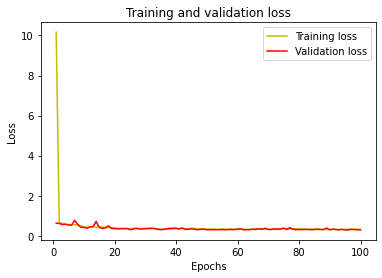

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

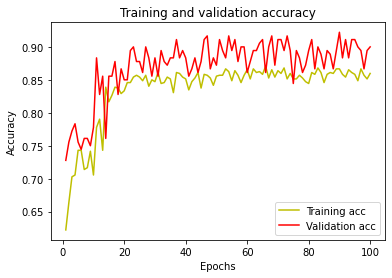

In [13]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        97
           1       0.90      0.88      0.89        83

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180

[[89  8]
 [10 73]]
